# $$L_n(x) = \sum \limits_{j = 0}^{n} f(x_j) \prod \limits_{\substack{i=0\\ i \neq j}}^{n} \frac{x - x_i} {x_j - x_i}$$

## $$f(x) = e^x + \cos{x}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def f(x):
    return math.exp(x) + math.cos(x)

In [3]:
def myLagrange(x_ar, y_ar):
    L = 0
    for j in range(len(x_ar)):
        product = 1
        for i in range(len(x_ar)):
            if i != j:
                product *= np.poly1d([1, -x_ar[i]]) / (x_ar[j] - x_ar[i])
        L += y_ar[j] * product
    return L

In [4]:
def L_n(a, b, k):
    x = np.arange(a, b + 0.000001, (b-a)/(k - 1))
    y = [f(k) for k in x]
    return myLagrange(x, y)

In [5]:
x = np.arange(0, 2 + 1/1000, 1/1000)

## 3 узла

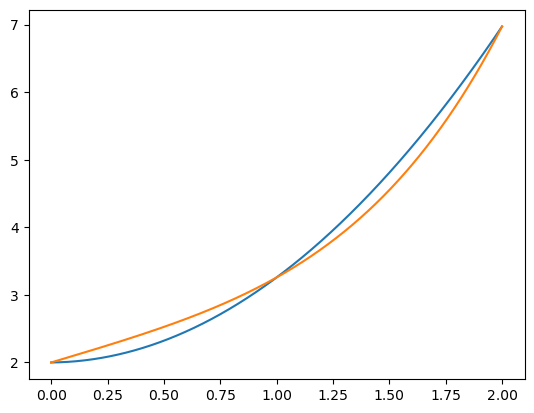

In [6]:
plt.plot(x, L_n(0, 2, 3)(x))
plt.plot(x, [f(k) for k in x])

## 5 узлов

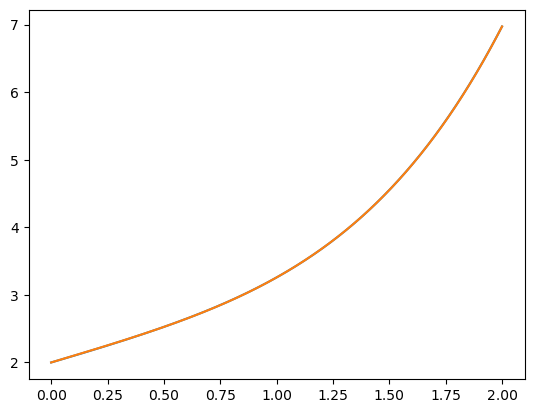

In [7]:
plt.plot(x, L_n(0, 2, 5)(x))
plt.plot(x, [f(k) for k in x])

## 10 узлов

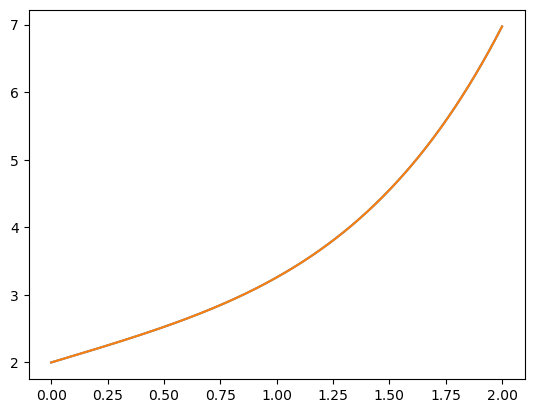

In [8]:
plt.plot(x, L_n(0, 2, 10)(x))
plt.plot(x, [f(k) for k in x])

## 3, 5, 10 узлов на одном графике

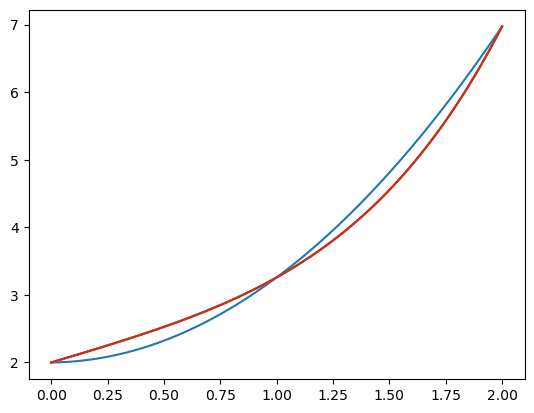

In [9]:
plt.plot(x, L_n(0, 2, 3)(x))
plt.plot(x, [f(k) for k in x])
plt.plot(x, L_n(0, 2, 5)(x))
plt.plot(x, L_n(0, 2, 10)(x))

# $$\max_{x \in [0, 2]}|f(x) - L_n(x)| \le \frac{M_{n+1}} {(n + 1)!}\max_{x \in [0, 2]}|\omega_{n+1}(x)|$$

In [10]:
def err(x_ar, k):
    a, b = min(x_ar), max(x_ar)
    L = L_n(a, b, k)
    y_err = []
    for x in x_ar:
        y_err.append(abs(f(x) - L(x)))
    return y_err
    

## Максимальная погрешность для 3 узлов

In [11]:
max(err(x, 3))

0.2686653150252418

## Максимальная погрешность для 5 узлов

In [12]:
max(err(x, 5))

0.002229047432243725

## Максимальная погрешность для 10 узлов

In [13]:
max(err(x, 10))

9.739808959352558e-09

# $$x_i = \frac{1}{2} \left( (b - a)\cos \left(\frac{(2i + 1)\pi}{2(n + 1)} \right)  + b + a \right), \quad i = 0, 1, ..., n$$

In [14]:
def opt_node(x):
    a, b = min(x), max(x)
    opt = []
    n = len(x)
    for i in range(len(x)):
        opt.append(( (b - a) * math.cos( (math.pi * (2 * i + 1))/(2 * (n-1) + 2) ) + b + a)/2)
    opt.reverse()
    return opt

## 3, 5, 10 оптимальных узлов на одном графике

In [15]:
def ab(a, b, k):
    return np.arange(a, b + 0.000001, (b-a)/(k - 1))

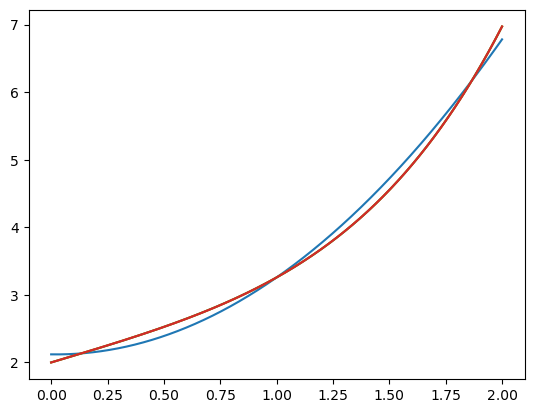

In [16]:
ab_ar = ab(0, 2, 3)
plt.plot(x, myLagrange(opt_node(ab_ar), [f(k) for k in opt_node(ab_ar)])(x))
plt.plot(x, [f(k) for k in x])
ab_ar = ab(0, 2, 5)
plt.plot(x, myLagrange(opt_node(ab_ar), [f(k) for k in opt_node(ab_ar)])(x))
ab_ar = ab(0, 2, 10)
plt.plot(x, myLagrange(opt_node(ab_ar), [f(k) for k in opt_node(ab_ar)])(x))

# Максимальная погрешность для оптимальных вершин

In [17]:
def err_o(x_ar, ab_ar):
    a, b = min(ab_ar), max(ab_ar)
    L = myLagrange(opt_node(ab_ar), [f(k) for k in opt_node(ab_ar)])
    y_err = []
    for x in x_ar:
        y_err.append(abs(f(x) - L(x)))
    return y_err

In [18]:
max(err_o(x, ab(0, 2, 3)))

0.19089165523339702

In [19]:
max(err_o(x, ab(0, 2, 5)))

0.001278545678779608

In [20]:
max(err_o(x, ab(0, 2, 10)))

1.4446159823933158e-09

# Графики погрешностей равномерных и оптимальных узлов

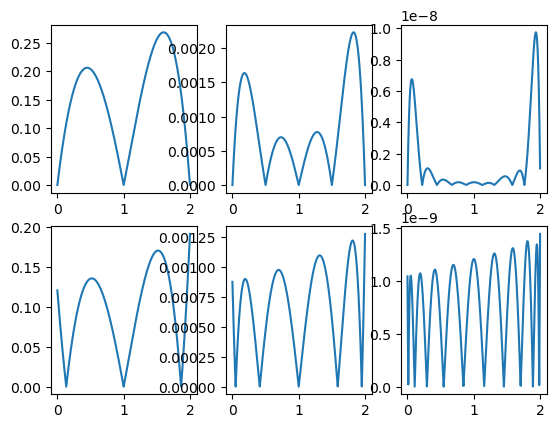

In [22]:
fig, ax = plt.subplots(2,3)
ax[0, 0].plot(x, err(x, 3))
ax[0, 1].plot(x, err(x, 5))
ax[0, 2].plot(x, err(x, 10))
ax[1, 0].plot(x, err_o(x, ab(0, 2, 3)))
ax[1, 1].plot(x, err_o(x, ab(0, 2, 5)))
ax[1, 2].plot(x, err_o(x, ab(0, 2, 10)))